In [1]:
import numpy as np
import pandas as pd

# Rename

In [34]:
df1 = pd.DataFrame(
[
    [1,2,3],
    [6,3,8],
    [2,0,8],
    [4,12,4]
]
, columns = ['A','B','C'])
df1

,A,B,C
0,1,2,3
1,6,3,8
2,2,0,8
3,4,12,4


In [35]:
df1.rename(columns={'A':'a', 'B':'b'})

,a,b,C
0,1,2,3
1,6,3,8
2,2,0,8
3,4,12,4


In [37]:
df1.rename(columns={'A':'a', 'B':'b'}, index={0:12, 2:99})

,a,b,C
12,1,2,3
1,6,3,8
99,2,0,8
3,4,12,4


# MultiIndex

In [14]:
df = pd.DataFrame(
{"a" : [4 ,5, 6],
"b" : [7, 8, 9],
"c" : [10, 11, 12]},
index = pd.MultiIndex.from_tuples(
        [('d',1),('d',2),('e',2)],
        names=['n','v'])  )

df

a  b   c
n v          
d 1  4  7  10
  2  5  8  11
e 2  6  9  12

# Melt

In [15]:
pd.melt(df)

,variable,value
0,a,4
1,a,5
2,a,6
3,b,7
4,b,8
5,b,9
6,c,10
7,c,11
8,c,12


In [19]:
df = pd.DataFrame(
[
    [1,2,3],
    [6,3,8],
    [2,0,8],
    [4,12,4]
]
, columns = ['A','B','C'])
df

,A,B,C
0,1,2,3
1,6,3,8
2,2,0,8
3,4,12,4


In [20]:
df.melt()

,variable,value
0,A,1
1,A,6
2,A,2
3,A,4
4,B,2
5,B,3
6,B,0
7,B,12
8,C,3
9,C,8


In [21]:
pd.melt(df)

,variable,value
0,A,1
1,A,6
2,A,2
3,A,4
4,B,2
5,B,3
6,B,0
7,B,12
8,C,3
9,C,8


In [26]:
melted = df.melt().rename(columns={'variable' : 'var','value' : 'val'}).query('val >= 8')
melted

,var,val
7,B,12
9,C,8
10,C,8


In [28]:
melted = df.melt().rename(columns={'variable' : 'var','value' : 'val'})
melted

,var,val
0,A,1
1,A,6
2,A,2
3,A,4
4,B,2
5,B,3
6,B,0
7,B,12
8,C,3
9,C,8


# Pivot

In [29]:
melted.pivot(columns='var', values='val')

var,A,B,C
0,1.0,NaN,NaN
1,6.0,NaN,NaN
2,2.0,NaN,NaN
3,4.0,NaN,NaN
4,NaN,2.0,NaN
5,NaN,3.0,NaN
6,NaN,0.0,NaN
7,NaN,12.0,NaN
8,NaN,NaN,3.0
9,NaN,NaN,8.0


# Concat

In [46]:
df1 = pd.DataFrame(
[
    [1,2,3],
    [6,3,8],
    [2,0,8],
    [4,12,4]
]
, columns = ['A','B','C'])
df1

,A,B,C
0,1,2,3
1,6,3,8
2,2,0,8
3,4,12,4


In [47]:
df2 = pd.DataFrame(
[
    [7,0,4],
    [3,4,1],
    [7,8,0],
    [5,2,4]
]
, columns = ['A','B','C'])
df2

,A,B,C
0,7,0,4
1,3,4,1
2,7,8,0
3,5,2,4


In [48]:
pd.concat([df1,df2], axis = 0)

,A,B,C
0,1,2,3
1,6,3,8
2,2,0,8
3,4,12,4
0,7,0,4
1,3,4,1
2,7,8,0
3,5,2,4


In [49]:
pd.concat([df1,df2], axis = 1)

,A,B,C,A,B,C
0,1,2,3,7,0,4
1,6,3,8,3,4,1
2,2,0,8,7,8,0
3,4,12,4,5,2,4


# Reset Index

In [50]:
pd.concat([df1,df2], axis = 0)

,A,B,C
0,1,2,3
1,6,3,8
2,2,0,8
3,4,12,4
0,7,0,4
1,3,4,1
2,7,8,0
3,5,2,4


In [51]:
pd.concat([df1,df2], axis = 0).reset_index()

,index,A,B,C
0,0,1,2,3
1,1,6,3,8
2,2,2,0,8
3,3,4,12,4
4,0,7,0,4
5,1,3,4,1
6,2,7,8,0
7,3,5,2,4


In [52]:
pd.concat([df1,df2], axis = 0).reset_index(drop = True)

,A,B,C
0,1,2,3
1,6,3,8
2,2,0,8
3,4,12,4
4,7,0,4
5,3,4,1
6,7,8,0
7,5,2,4


# Percentage Change

In [104]:
df1 = pd.DataFrame(
[
    [1,2,3],
    [2,4,8],
    [3,8,8],
    [4,16,8*1.1]
]
, columns = ['A','B','C'])
df1

,A,B,C
0,1,2,3.0
1,2,4,8.0
2,3,8,8.0
3,4,16,8.8


In [105]:
df1.pct_change(periods = 1)

,A,B,C
0,NaN,NaN,NaN
1,1.000000,1.0,1.666667
2,0.500000,1.0,0.000000
3,0.333333,1.0,0.100000


In [106]:
df1.pct_change(periods = -1)

,A,B,C
0,-0.500000,-0.5,-0.625000
1,-0.333333,-0.5,0.000000
2,-0.250000,-0.5,-0.090909
3,NaN,NaN,NaN


# Histogram

In [67]:
s = pd.Series([1,2,2,2,1,1,1,2,2,1,1,2,2,1,3,2,2,3,2,2,2])

In [68]:
count, division = np.histogram(s)

In [69]:
count

array([ 7,  0,  0,  0,  0, 12,  0,  0,  0,  2], dtype=int64)

In [70]:
division

array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ])

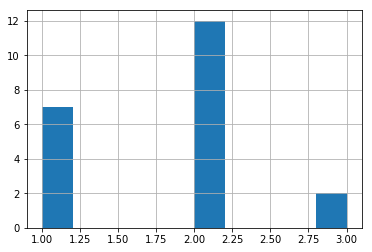

In [71]:
s.hist(bins=division)

In [72]:
df = pd.read_csv('Data/hsi.csv')

[  13 1691 5391   20    4]
==
[-0.13700442 -0.07195633 -0.00690825  0.05813983  0.12318792  0.188236  ]


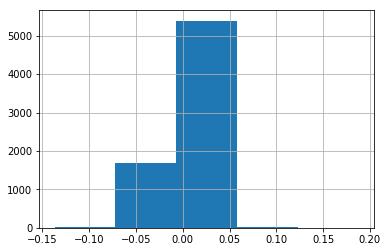

In [111]:
count, division = np.histogram(  df['Close'].pct_change(periods = 1).dropna()  , bins = 5)
print(count)
print('==')
print(division)
df['Close'].pct_change(periods = 1).dropna().hist(bins=division)

[   2   11   85 1606 5127  264   17    3    3    1]
==
[-0.13700442 -0.10448038 -0.07195633 -0.03943229 -0.00690825  0.02561579
  0.05813983  0.09066388  0.12318792  0.15571196  0.188236  ]


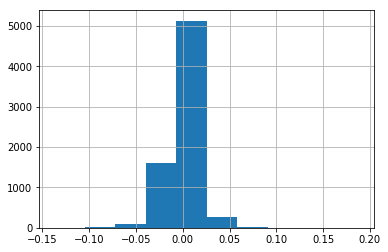

In [112]:
count, division = np.histogram(  df['Close'].pct_change(periods = 1).dropna()  , bins = 10)
print(count)
print('==')
print(division)
df['Close'].pct_change(periods = 1).dropna().hist(bins=division)

[   1    1    0    0    0    1    0    4    4    2    5    3   14   25
   38   63  112  224  433  774 1504 1833  988  532  270  129   63   43
   14   15    7    2    4    1    3    1    1    1    0    0    1    0
    0    2    0    0    0    0    0    1]
==
[-0.13700442 -0.13049961 -0.1239948  -0.11748999 -0.11098518 -0.10448038
 -0.09797557 -0.09147076 -0.08496595 -0.07846114 -0.07195633 -0.06545153
 -0.05894672 -0.05244191 -0.0459371  -0.03943229 -0.03292748 -0.02642268
 -0.01991787 -0.01341306 -0.00690825 -0.00040344  0.00610137  0.01260617
  0.01911098  0.02561579  0.0321206   0.03862541  0.04513022  0.05163502
  0.05813983  0.06464464  0.07114945  0.07765426  0.08415907  0.09066388
  0.09716868  0.10367349  0.1101783   0.11668311  0.12318792  0.12969273
  0.13619753  0.14270234  0.14920715  0.15571196  0.16221677  0.16872158
  0.17522638  0.18173119  0.188236  ]


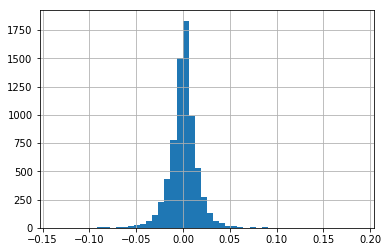

In [113]:
count, division = np.histogram(  df['Close'].pct_change(periods = 1).dropna()  , bins = 50)
print(count)
print('==')
print(division)
df['Close'].pct_change(periods = 1).dropna().hist(bins=division)